In [29]:
# Se importan las librerias que vamos a usar
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importamos la data
data = pd.read_csv(r'C:\Users\mlopez\Documents\dataMLRL.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [57]:
data.max()

Population    22.203
Profit        24.147
dtype: float64

<AxesSubplot:xlabel='Population', ylabel='Profit'>

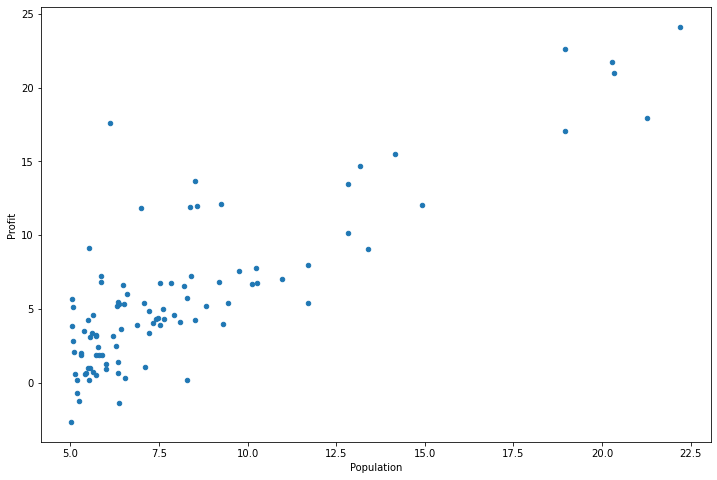

In [5]:
# Vemos la data para entender el analisis
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [6]:
# vemos la informacion de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [7]:
# Creamos la data para training y la data para testing
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [60]:
# Entrenamos el modelo con la data de training y conseguimos los coeficientes para la regresion lineal
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = train[['Population']]
train_y = train[['Profit']]
regr.fit(train_x, train_y)
# Coeficientes
print ('Coeficiente Theta 1: ', regr.coef_)
print ('Coeficiente Theta 0: ',regr.intercept_)

Coeficiente Theta 1:  [[1.19741235]]
Coeficiente Theta 0:  [-3.82429538]


In [12]:
# Probamos el modelo con nuestra data de testing y calculamos MAE, MST Y R2 SCORE

from sklearn.metrics import r2_score

test_x = test[['Population']]
test_y = test[['Profit']]
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 2.62
Residual sum of squares (MSE): 10.41
R2-score: 0.80


C:\Users\mlopez\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

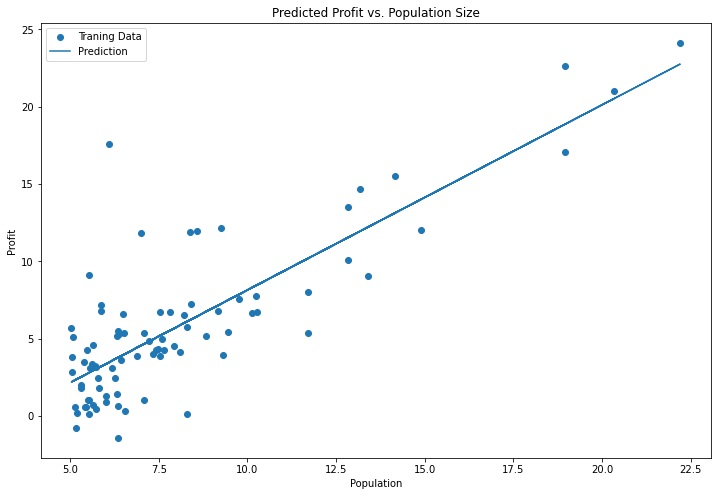

In [53]:
# Graficamos el resultado de la prediccion vs la data de entrenamiento

y1=regr.coef_[0][0]*train_x + regr.intercept_[0]
x1=train_x

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(train.Population, train.Profit, label='Traning Data')
plt.plot(x1['Population'],y1['Population'], label='Prediction')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


In [59]:
# Probamos el predictor de ganancia usando como ejemplo una ciudad con poblacion de 20000 personas

FirstCity = 20000

predict=regr.intercept_+regr.coef_*FirstCity

print('La prediccion de ganancias para la ciudad con population de:', FirstCity, 'personas es:', predict[0,0], "$")

La prediccion de ganancias para la ciudad con population de: 20000 personas es: 23944.422800747638 $
